In [197]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import csv
import time
import statistics

In [198]:
all_data = []
all_limits = []

In [199]:
#read in blob dataset

X_training = []
y_training = []
header = []
c = 0
with open("DataSets/blob_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row
            c+=1
            continue
        X_training.append([ float(x) for x in row])
        
with open("DataSets/blob_label.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        y_training.append(int(row[0]))


threshold = []
for i in range(len(X_training[0])):
    vector = [x[i] for x in X_training]
    threshold.append([min(vector),max(vector)])

all_limits.append(threshold)
        
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])

In [200]:
#read in iris dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/iris.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row[:-1]
            c+=1
            continue
        X_training.append([float(x) for x in row[:-1]])
        y_training.append(row[-1])

for i in range(len(y_training)):
    if(y_training[i] == "Setosa"):
        y_training[i] = 1
    if(y_training[i] == "Versicolor"):
        y_training[i] = 2
    if(y_training[i] == "Virginica"):
        y_training[i] = 3

threshold = []
for i in range(len(X_training[0])):
    vector = [x[i] for x in X_training]
    threshold.append([min(vector),max(vector)])

all_limits.append(threshold)


X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])


In [201]:
#read in wine dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/winequality-white_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row
            c+=1
            continue
        X_training.append([float(x) for x in row[:-1]])
        y_training.append(float(row[-1]))
        #print(row)

threshold = []
for i in range(len(X_training[0])):
    vector = [x[i] for x in X_training]
    threshold.append([min(vector),max(vector)])

all_limits.append(threshold)


X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])


In [202]:
#read in house price dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/house_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row
            c+=1
            continue
        X_training.append([float(x) for x in row])
        
with open("DataSets/house_price.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        y_training.append(float(row[0]))


threshold = []
for i in range(len(X_training[0])):
    vector = [x[i] for x in X_training]
    threshold.append([min(vector),max(vector)])

all_limits.append(threshold)
        
print(len(X_training))
print(len(y_training))
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])





10000
10000


In [203]:
#Sort dataset by an attribute.(increasing order)
def sort_f(X,y,column):
    

  
    sortf = zip(X,y)
    sortf= sorted(sortf,key = lambda x:x[0][column])
    X = [x for x,y in sortf]
    y = [y for x,y in sortf]
    
    

    return X,y

In [204]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0
        self.currentsplit = 0
        self.split_result = 0
        self.feature_names = feature_names #coloum names
        self.labels = labels#y
        self.nodes = []
        self.steps = [0]
        self.leaf = 0
        self.std = 0
        

In [205]:
class Node:
    def __init__(self,labels,X,feature_ids):
        
        self.split_result = 0
        self.split = 0 #which column / which feature id
        self.feature_ids = feature_ids
        self.labels = labels
        self.X = X
        self.nodes = []
        self.steps = []
        self.variance = []
        self.std = []
        self.thresholds = []
        
        self.leaf = 0 #true or false

In [206]:
def get_features(X,labels,column,bottom,top):
    
    #Return a portion of the dataset, which's attributes is in a certain


    sub_label = [labels[x] for x in range(len(labels)) if X[x][column]<top and X[x][column]>=bottom]
    sub_X = [X[x] for x in range(len(X)) if X[x][column]<top and X[x][column]>=bottom]

        
    return [sub_X,sub_label]

In [207]:

def calculate_std2(data):
    
    #print(data)
    mean = sum(data)/len(data)
    
    variance = 0
    
    for i in data:
        #variance += (abs(i-mean))**3
        variance += (abs(i-mean))**2
    
    
    return math.sqrt(variance/len(data))
    #std = variance/len(data)
    a = 0
    for i in data:
         a += (abs(i-max(data)))**2
    return a/len(data)



    

In [208]:


def calculate_std(data1,data2):
    
    #print(data)
    data = data1 + data2
    std = 0
    mean = sum(data)/len(data)
    variance = 0


   
    
    for i in data:

        #variance += (abs(i-mean))**3
        variance += (abs(i-mean))**2
    
    std = math.sqrt(variance/len(data))
    #std = variance/len(data)

    return std



In [209]:
def find_min_distance(sliced_data,column):
    
    std = 0
    min_std = -1
    index1 = -1
    index2 = -1

    labels = [i[1] for i in sliced_data]
    
    #determine what to merge by the standard deviation
    
    for i in range(len(sliced_data)-1):

            std = 0
            #dist = abs(calculate_std(sliced_data[i][1])-calculate_std(sliced_data[i+1][1]))
            #dist = abs(calculate_std(X)-calculate_std(X2))
            #dist = math.sqrt(calculate_std(y1,y2))
            std =  (len(sliced_data[i][1]+sliced_data[i+1][1])/len(sliced_data)) * calculate_std(sliced_data[i][1],sliced_data[i+1][1])
            #std = calculate_std(sliced_data[i][1],sliced_data[i+1][1])


            #dist /=len(sliced_data[i][0][0]) 
            if(min_std == -1):
                min_std = std
                index1 = i
                index2 = i+1
            if(std<min_std):
                min_std = std
                index1 = i
                index2 = i+1
    
    return index1,index2
    


In [210]:


def merge(sliced_data,column):
    
   

    index1,index2 = find_min_distance(sliced_data,column)
    

    sliced_data[index1][0] = sliced_data[index1][0]+sliced_data[index2][0]
    sliced_data[index1][1] = sliced_data[index1][1]+sliced_data[index2][1]

   
    
    sliced_data.pop(index2)

    return sliced_data



In [211]:


def pre_merge(sliced_data,index,std,column):
    
   

    #index1,index2 = find_min_distance(sliced_data,column)
    std_local = 0
    
    y1 = sliced_data[index][1]
    y2 = sliced_data[index+1][1]
    std_local = (len(y1+y2)/len(sliced_data)) * calculate_std(y1, y2)
    #std_local =  calculate_std(y1, y2)

    #dist_local = math.sqrt(dist_local)
    #std_local = std_local/len(sliced_data[0][0][0])
   
    if(std_local <= std ) :

        sliced_data[index][0] = sliced_data[index][0]+sliced_data[index+1][0]
        sliced_data[index][1] = sliced_data[index][1]+sliced_data[index+1][1]
        sliced_data.pop(index+1)
        return sliced_data
   
    return sliced_data



In [212]:


def calculate_std_avg(features):
        std= 0


        for i in range(len(features)-1):

            std += (len(features[i]+features[i+1])/len(features)) * calculate_std(features[i],features[i+1])
            #std +=  calculate_std(features[i],features[i+1])

        std = std/len(features)
        #dist = math.sqrt(dist)
        return std



In [213]:


def preprocess(X,labels,column):#Az std valójában distance
    

    sliced_data = [[ [x] , [y] ] for x,y in zip(X,labels)]

    

    #features = [ [X[j][column]] for j in range(len(X)) ] 
    labels = [ [j] for j in labels ] 


    std_avg = calculate_std_avg(labels)

    #for i in range(len(sliced_data[0][0][0])):
        #std += calculate_std_avg(get_features2(sliced_data,i))

    #for i in labels:
    #    std_avg += calculate_std2(i)
    #std_avg += calculate_std_avg(labels)
    #std_avg = std_avg/len(labels)

    index = -1
    l = 0

    while(len(sliced_data)>=20):

        index += 1
        if(index>=len(sliced_data)-1):
            index = 0
            if(len(sliced_data) == l):
                break
            else:
                l = len(sliced_data)
            std = 0
            #for i in range(len(sliced_data[0][0][0])):
            #    std += calculate_std_avg(get_features2(sliced_data,i))
            std_avg = calculate_std_avg(labels)
        
        sliced_data = pre_merge(sliced_data,index,std_avg,column)
        

    return sliced_data



In [214]:
def find_best_split(X,labels,feature_ids,steps,div):
    
    step = -1

    features = 0 
    svalue = 0
    
    min_error = -1
    min_sliced_data = []
    min_regressions = []
    min_steps = -1
    min_column = -1



    for column in feature_ids:
            
            
            X,labels = sort_f(X,labels,column)        

            if(steps[column] > 8 ):
                    continue


            sliced_data = preprocess(X,labels,column)
           
            while(len(sliced_data)>div):

                sliced_data = merge(sliced_data,column)

            
            error = 0



            for i in range(len(sliced_data)):
                
                error += (len(sliced_data[i][1])/len(labels))*calculate_std2(sliced_data[i][1])
                #error += (len(sliced_data[i][1])/len(sliced_data))*calculate_std2(sliced_data[i][1])
            error = calculate_std2(labels)-error
            #error = calculate_std2(labels)-error

            if(min_error == -1):
                min_sliced_data = sliced_data        
                min_column = column
                min_error = error
                continue
            #choose the splited data with the minimum error
            if(error>min_error):
                min_sliced_data = sliced_data
                min_error = error
                min_column = column
    
    #return split,split_value
    steps[min_column] += 1
    
    return min_sliced_data,min_column,steps

In [215]:
def build_tree(X,feature_ids,labels,leaf_size,limit,div,depth,steps,X_train,y_train):
    
    #find the best split for sub_nodes
    #return sub_nodes
    split = 0 
    sub_nodes = []
    
    st = steps.copy()

    #get the best split 
    split_data,column,st = find_best_split(X,labels,feature_ids,st,div)

    
    #create objects and inicialize them
    for i in split_data:
        
        node = Node(i[1],i[0],feature_ids)
        node.split = column 

        node.split_result = i[0][-1][column]
        node.depth = depth
        
        node.top =   max([x[column] for x in node.X ])
        node.bottom = min([x[column] for x in node.X ])

        for j in range(len(node.X[0])):
            node.thresholds.append([min([x[j] for x in node.X ]),max([x[j] for x in node.X ])])

        node.steps = st

        node.std.append(calculate_std2(node.labels))

        
        if(len(node.labels) <= leaf_size or calculate_std2(node.labels)<limit):
            node.leaf = 1
            #print(node.X)
            #print(node.labels)
            #print(' ')
            #if(len(split_data) >2 ):
            #    print(node.steps)

            
        else:
            node.leaf = 0
            
        sub_nodes.append(node)
    
    if(depth == 2000):
        for i in sub_nodes:
            i.leaf = 1
        return sub_nodes
    
    depth +=1
    #print(depth)

    leaf =  0
    for i in sub_nodes:
        if(i.leaf == 1):
            leaf +=1
            
    if(leaf == len(sub_nodes)):
        '''for i in sub_nodes:

            if(calculate_std(i.labels)>=100):

                print(calculate_std(i.labels),len(i.labels))'''  
        return sub_nodes
  
    else:
        for node in sub_nodes:

            if(node.leaf == 0):

                node.nodes = build_tree(node.X,node.feature_ids,node.labels,leaf_size,limit,div,depth,node.steps,X_train,y_train)


    return sub_nodes   

In [216]:
def inicialize(X,feature_names,labels,leaf_size,limit,div):
    
    depth = 1
    feature_ids = [x for x in range(len(feature_names))]
    tree = Tree(X,feature_names,labels)
    
    steps = []
    for i in feature_ids:
        steps.append(0)
    #start building tree
    tree.nodes = build_tree(X,feature_ids,labels,leaf_size,limit,div,depth,steps,X,labels)
    return tree

In [217]:
forest = []
times = []

divide = [2,3,4,5]
counter = 0

for i in all_data:
    f = []
    t = []


    if(counter == 0):
        size =20
        var = 0.5
    if(counter == 1):
        size =10
        var = 0.2
    if(counter == 2):
        size =20
        var = 0.5
    if(counter == 3):
        size = 20
        var = 1


    for j in divide:
       
        print("-------------------------------------------------------")


        start = time.time()
        tree = inicialize(i[0],i[-1],i[2],size,var,j)
        end = time.time()
        f.append(tree)
        print(end-start)
        t.append(end-start)
        
    counter+=1
    forest.append(f)
    times.append(t)
    

-------------------------------------------------------


16.82074499130249
-------------------------------------------------------
12.841880083084106
-------------------------------------------------------
11.84892225265503
-------------------------------------------------------
11.399698734283447
-------------------------------------------------------
0.005927324295043945
-------------------------------------------------------
0.0039691925048828125
-------------------------------------------------------
0.003261566162109375
-------------------------------------------------------
0.003305673599243164
-------------------------------------------------------
31.88611912727356
-------------------------------------------------------
23.058655261993408
-------------------------------------------------------
20.931811571121216
-------------------------------------------------------
19.468602895736694
-------------------------------------------------------
60.305437088012695
-------------------------------------------------------
43.07257533073425
-

In [218]:
def predict(node,value,thresholds,weight,y):


    

    if(node.leaf == 1 ):


        p = sum(node.labels)/len(node.labels)

        X = []
        X2 = []
        #error = 0
        for i in range(len(node.X[0])):
            X2.append(sum([ node.X[j][i]  for j in range(len(node.X)) ])/len(node.X) )

        for i in range(len(node.X[0])):
            X.append(sum([ ((node.X[j][i]-thresholds[i][0])/(thresholds[i][1]-thresholds[i][0])) * weight[i]  for j in range(len(node.X)) ]) )
            #X.append(sum([ ((node.X[j][i]-thresholds[i][0])/(thresholds[i][1]-thresholds[i][0]))   for j in range(len(node.X)) ]) )

        X = [x / len(node.X) for x in X]
        #if(abs(y-p)>10):
        #print(X2,p)
        error = 0

        for i in range(len(X)):

            error +=  abs( X[i]- (((value[i]-thresholds[i][0])/(thresholds[i][1]-thresholds[i][0])) * weight[i] ))
            #error +=  abs(X[i]-value[i])
        
        

        p=[p,error]
        
        return p
    else:
        
        c=0
        
        p = 0
        
        values = []
        for i in node.nodes:

            if (i.top>=value[i.split] and i.bottom<=value[i.split]  ):

                c+=1
                
                p = predict(i,value,thresholds,weight,y)

                for k in p:
                    values.append(k)

        if(c == 0  ):
           

            p = sum(node.labels)/len(node.labels)

            X = []
            X2 = []
            for i in range(len(node.X[0])):
                X2.append(sum([ node.X[j][i]  for j in range(len(node.X)) ])/len(node.X) )
            #error = 0
            for i in range(len(node.X[0])):
                X.append(sum([ ((node.X[j][i]-thresholds[i][0])/(thresholds[i][1]-thresholds[i][0])) * weight[i]  for j in range(len(node.X)) ]) )
                #X.append(sum([ ((node.X[j][i]-thresholds[i][0])/(thresholds[i][1]-thresholds[i][0]))   for j in range(len(node.X)) ]) )

            X = [x /len(node.X) for x in X]
            #if(abs(y-p)>10):
            #print(X2,p)
            error = 0
        
            for i in range(len(X)):
                error +=  abs(X[i]- ((value[i]-thresholds[i][0])/(thresholds[i][1]-thresholds[i][0])) * weight[i] )
                #error +=  abs(X[i]-value[i])
                
            
            p=[p,error]

            return p

        return values
        

In [219]:
def get_threshold(node):

    if(node.leaf == 1):
        return node.steps,node.depth


    thresholds = [0] * len(node.X[0])
    counter = 1

    #depth = 1
    
    for i in node.nodes:
        s,depth = get_threshold(i)

        for j in range(len(s)):
            thresholds[j] += s[j]
        counter+=depth
    return thresholds,counter
    

    

In [220]:

predicted_value = []#predicted points
difference = []
MSE = []
sum_y = []

#all_difference = []
all_mse = []
all_std = []
#for each tree we calculate the mean squared error

c = 0

for v in range(len(forest)):
    MSE = []
    counter = 0
    for i in forest[v]:
        counter += 1
        j = all_data[v]
        
        X_test = j[1]
        y_test = j[3]
        pv = []
        error = 0
        mse = 0
        l = 0
        thresholds,depth = get_threshold(i)

        thresholds = [x/depth for x in thresholds]
        #if(v == 3):
        #    thresholds = [12,7,1,100]
        print(thresholds)
        #threshold = [10,5]
        #thresholds = [12,3,1,80]
        #thresholds = [12,7,1,100]
        #thresholds = [1] * 20
        #thresholds = [100,40,30,1000]
        #if(v == 3):
        
        for k in range(len(X_test)): 
            #print("/////////")
            #print(X_test[k],y_test[k])
            pr = predict(i,X_test[k],all_limits[v],thresholds,y_test[k])

            p = 0



            prev = pr[0]
            if(pr[0] != 0):

                for f in range(0,len(pr)-1,2):
                    if(pr[f+1]<prev):
                        prev = pr[f+1]
                        p = pr[f]

            #print(p)
            
            #print(p)
            error += abs(y_test[k]-p)
            '''if(abs(y_test[k]-p)>3):
                print(abs(y_test[k]-p),p)
                #p = y_test[k]+3
                print("////////////////////////////////////////////////////////////////////////////////////////////////////////////////")'''
            mse += (y_test[k]-p)**2
            pv.append(p)
           


        sum_y.append(sum(y_test))
        predicted_value.append(pv)
        difference.append(error)
        MSE.append(mse/len(X_test))
        #MSE.append(mse/l)

    all_mse.append(MSE)
    
    
#print(difference)
#sprint(sum_y)

print(all_mse)
with open("Results3/difference_rtn.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    for row in all_mse:
        writer.writerow(row)
        
with open("Results3/times_rtn.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    
    for row in times:
        
        writer.writerow(row)
print(c)
print(len(predicted_value[0]))



[0.09523809523809523, 0.42857142857142855, 0.09523809523809523, 0.14285714285714285]
[0.34615384615384615, 0.3269230769230769, 0.09615384615384616, 0.09615384615384616]
[0.3218390804597701, 0.3563218390804598, 0.1724137931034483, 0.04597701149425287]
[0.3888888888888889, 0.42592592592592593, 0.09259259259259259, 0.0]
[0.0, 0.0, 0.5833333333333334, 0.16666666666666666]
[0.0, 0.0, 0.5, 0.3]
[0.0, 0.0, 0.0, 0.8]
[0.0, 0.0, 0.0, 0.8333333333333334]
[0.0473551637279597, 0.14760705289672543, 0.02468513853904282, 0.030226700251889168, 0.02216624685138539, 0.10730478589420656, 0.06801007556675064, 0.03425692695214106, 0.04181360201511335, 0.04181360201511335, 0.327455919395466]
[0.08112582781456953, 0.13741721854304637, 0.06788079470198675, 0.024834437086092714, 0.013245033112582781, 0.1335540838852097, 0.06346578366445917, 0.01434878587196468, 0.039735099337748346, 0.052428256070640174, 0.28807947019867547]
[0.021251475796930343, 0.1322314049586777, 0.0690672963400236, 0.04191263282172373, 0.

2000
623546.8476009073


Text(0.5, 1.0, 'Test data')

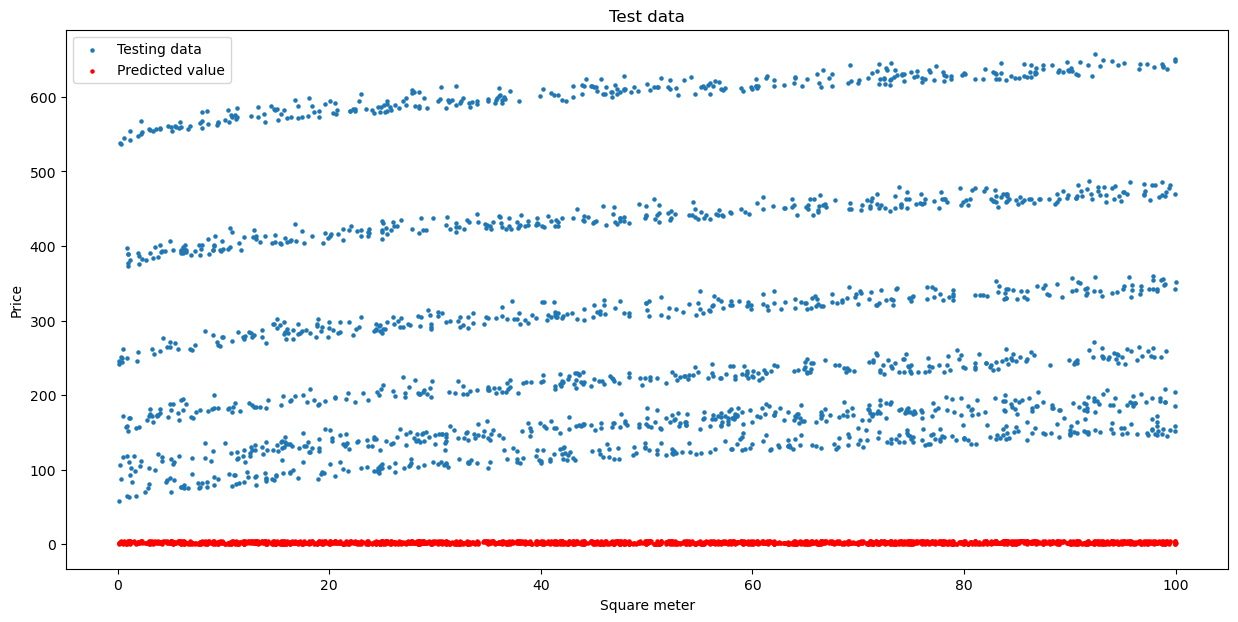

In [221]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(y_test))
#print(len(predicted_value[14]))
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ], predicted_value[1],c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")